In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from IPython.display import display, Markdown

In [3]:
df = pd.read_csv('./thyroid_cancer_risk_data.csv')
warnings.simplefilter('ignore')

In [4]:
df.shape

(212691, 17)

In [5]:
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

Cleaning des Nan et duplicates

In [7]:
df.dropna(inplace=True)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.drop(columns=['Patient_ID'], inplace=True)

Preview du dataset

In [10]:
df

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,58,Female,India,Asian,No,No,No,No,Yes,No,2.00,0.64,11.92,1.48,Low,Benign
212687,89,Male,Japan,Middle Eastern,No,No,No,No,Yes,No,9.77,3.25,7.30,4.46,Medium,Benign
212688,72,Female,Nigeria,Hispanic,No,No,No,No,No,Yes,7.72,2.44,8.71,2.36,Medium,Benign
212689,85,Female,Brazil,Middle Eastern,No,No,No,No,No,Yes,5.62,2.53,9.62,1.54,Medium,Benign


In [11]:
df.describe()

,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,51.918497,5.045102,2.001727,8.246204,2.503403
std,21.632815,2.860264,0.866248,2.164188,1.444631
min,15.000000,0.100000,0.500000,4.500000,0.000000
25%,33.000000,2.570000,1.250000,6.370000,1.250000
50%,52.000000,5.040000,2.000000,8.240000,2.510000
75%,71.000000,7.520000,2.750000,10.120000,3.760000
max,89.000000,10.000000,3.500000,12.000000,5.000000


## Génération des graphiques

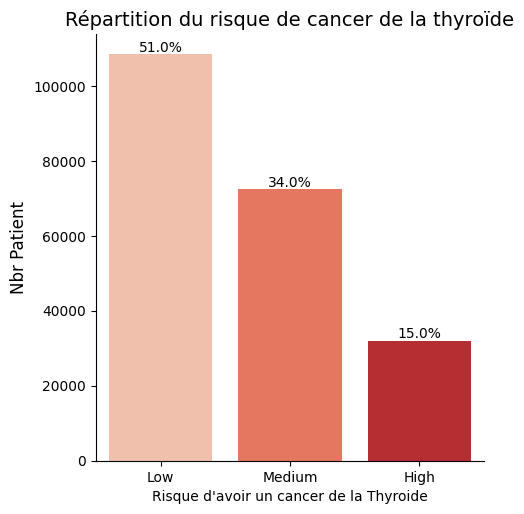

In [12]:
order = ['Low', 'Medium', 'High']
colors = sns.color_palette('Reds', len(order))

ax = sns.catplot(data=df, x='Thyroid_Cancer_Risk', kind='count', hue='Thyroid_Cancer_Risk', palette=dict(zip(order, colors)), order=order, legend=False)
# ax = sns.catplot(data=df, x='Thyroid_Cancer_Risk', kind='count', hue='Thyroid_Cancer_Risk', order=order, legend=False)
ax.ax.set_ylabel('Nbr Patient', fontsize=12)
ax.ax.set_xlabel('Risque d\'avoir un cancer de la Thyroide')
ax.ax.set_title('Répartition du risque de cancer de la thyroïde', fontsize=14)
for p in ax.ax.patches:
    height = p.get_height()  
    total = len(df) 
    percentage = f'{100 * height / total:.1f}%'  
    ax.ax.text(p.get_x() + p.get_width() / 2, height, percentage, ha='center', va='bottom', fontsize=10, color='black')
plt.show()

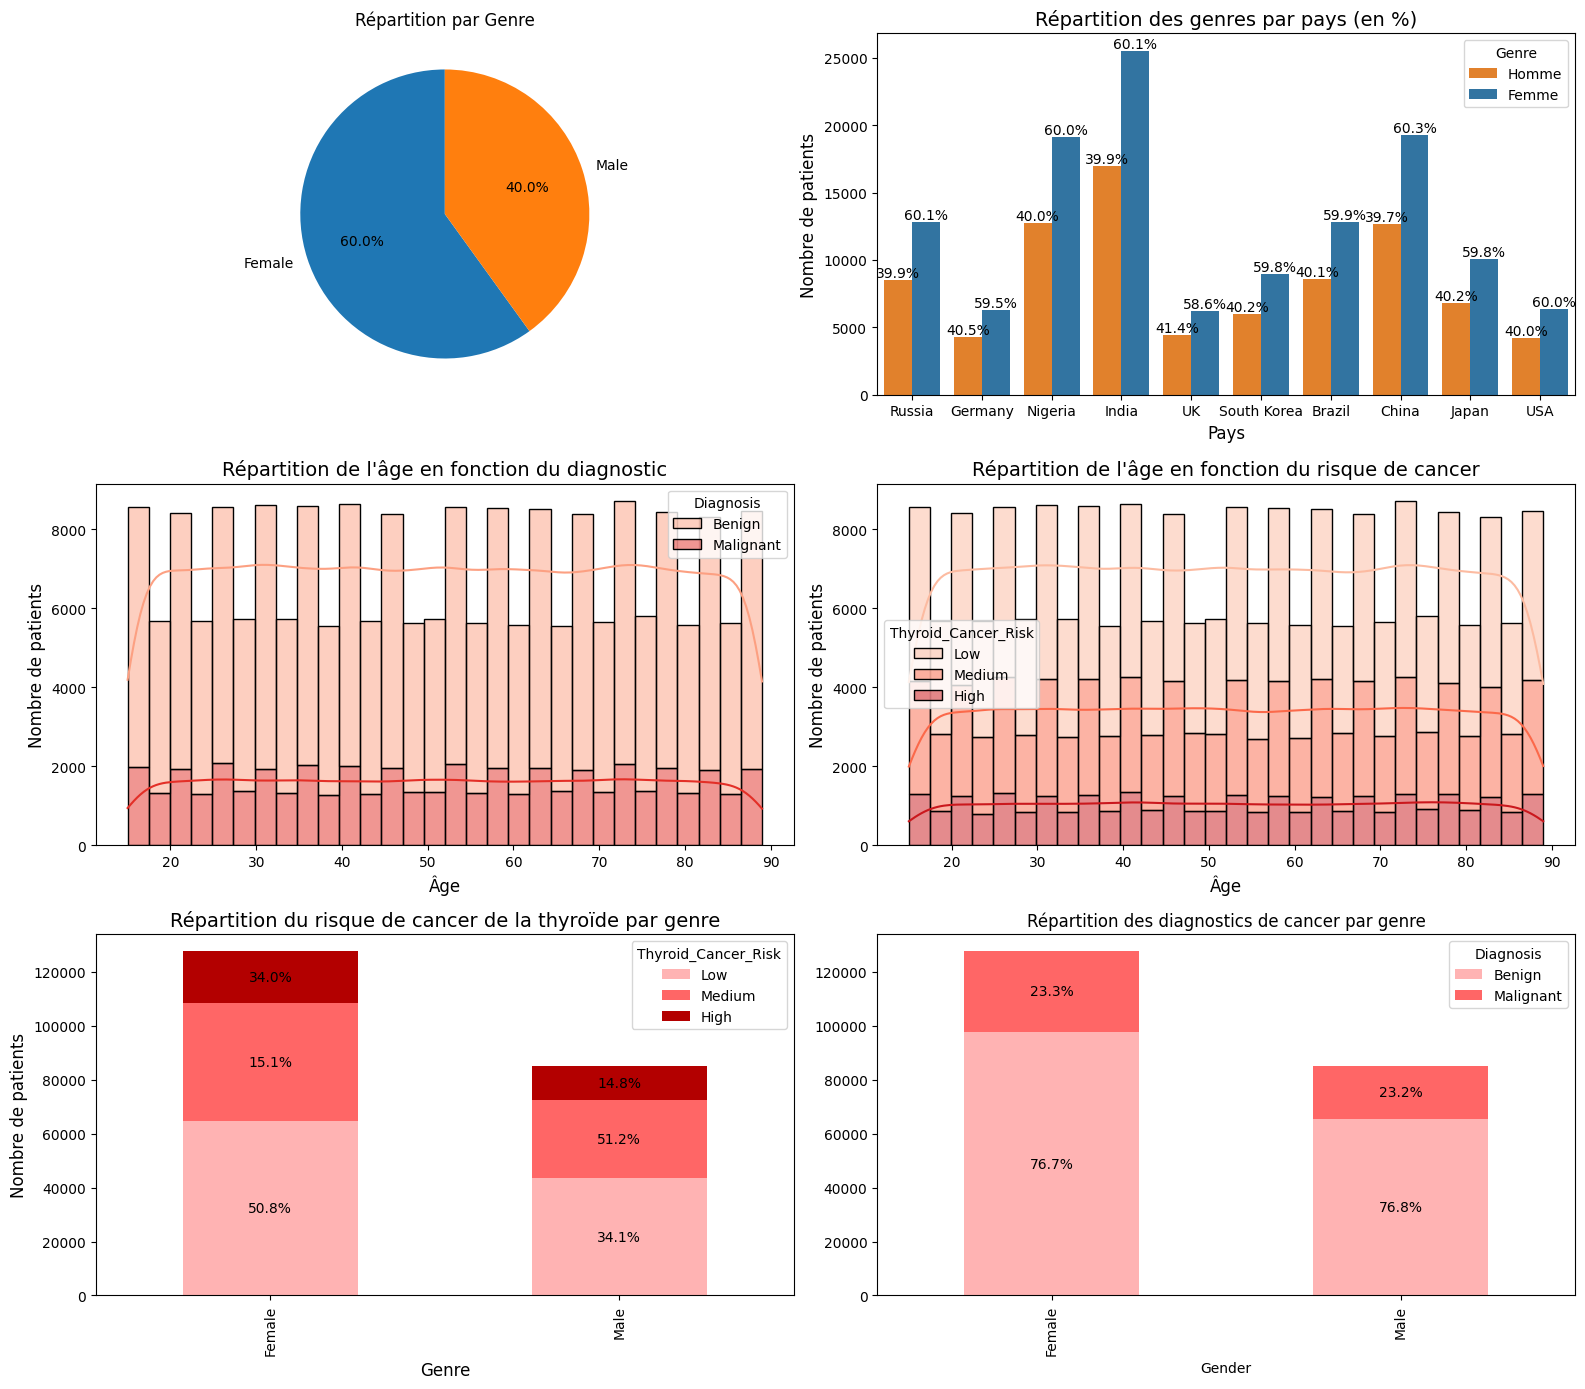


### Conclusion intermédiaire
On observe que la population étudiée est majoritairement composée de femme.

La répartition des âges est tout de même très homogène.

Il est donc pertinent d’analyser les facteurs de risque pouvant influencer le diagnostic.


In [13]:
fig, axes = plt.subplots(3, 2, figsize=(16, 14))

# Répartition des risques de cancer par genre
colors = ['#1f77b4', '#ff7f0e']  
gender_counts = df['Gender'].value_counts()
axes[0, 0].pie(gender_counts, labels=gender_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)  # ✅ Correction ici
axes[0, 0].set_title("Répartition par Genre")


# Répartition des genres par Pays
top_countries = df['Country'].value_counts().head(10).index
df_filtered = df[df['Country'].isin(top_countries)]
sns.countplot(data=df_filtered, x="Country", hue="Gender", palette=["#ff7f0e", "#1f77b4"], ax=axes[0, 1])
country_gender_counts = df_filtered.groupby(['Country', 'Gender']).size().unstack(fill_value=0)
country_totals = country_gender_counts.sum(axis=1)  
xticklabels = [tick.get_text() for tick in axes[0, 1].get_xticklabels()]
for p, country_name in zip(axes[0, 1].patches, xticklabels * 2):
    total = country_totals.loc[country_name]
    value = p.get_height() 
    if total > 0:
        percentage = f'{100 * value / total:.1f}%' 
        axes[0, 1].annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10, color='black')
axes[0, 1].set_title("Répartition des genres par pays (en %)", fontsize=14)
axes[0, 1].set_xlabel("Pays", fontsize=12)
axes[0, 1].set_ylabel("Nombre de patients", fontsize=12)
axes[0, 1].legend(title="Genre", labels=["Homme", "Femme"])


# Répartition des diagnostics en fonction de l'âge de la population
sns.histplot(data=df, x="Age", hue="Diagnosis", multiple="stack", kde=True, palette="Reds", bins=30, ax=axes[1, 0])
axes[1, 0].set_title("Répartition de l'âge en fonction du diagnostic", fontsize=14)
axes[1, 0].set_xlabel("Âge", fontsize=12)
axes[1, 0].set_ylabel("Nombre de patients", fontsize=12)


# Répartition des risques de cancer par tranche d'age
sns.histplot(data=df, x="Age", hue="Thyroid_Cancer_Risk", multiple="stack", kde=True, palette="Reds", bins=30, ax=axes[1, 1])
axes[1, 1].set_title("Répartition de l'âge en fonction du risque de cancer", fontsize=14)
axes[1, 1].set_xlabel("Âge", fontsize=12)
axes[1, 1].set_ylabel("Nombre de patients", fontsize=12)


# Répartition du risque de cancer par genre
gender_risk_counts = df.groupby(['Gender', 'Thyroid_Cancer_Risk']).size().unstack()
gender_risk_counts = gender_risk_counts[['Low', 'Medium', 'High']]
percentages = gender_risk_counts.div(gender_risk_counts.sum(axis=1), axis=0) * 100
gender_risk_counts.plot(kind="bar", stacked=True, color=['#ffb3b3', '#ff6666', '#b30000'], ax=axes[2, 0])
for p, percentage in zip(axes[2, 0].patches, percentages.values.flatten()):
    if p.get_height() > 0:
        percent_text = f'{percentage:.1f}%'
        axes[2, 0].annotate(percent_text, (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2), ha='center', va='center', fontsize=10, color='black')
axes[2, 0].set_title("Répartition du risque de cancer de la thyroïde par genre", fontsize=14)
axes[2, 0].set_xlabel("Genre", fontsize=12)
axes[2, 0].set_ylabel("Nombre de patients", fontsize=12)
plt.legend(title="Risque de cancer de la thyroïde", labels=["Faible", "Moyen", "Élevé"])


# Répartition du diagnotic de cancer par genre
gender_diagnosis_counts = df.groupby(["Gender", "Diagnosis"]).size().unstack()
gender_diagnosis_counts.plot(kind="bar", stacked=True, color=['#ffb3b3', '#ff6666', '#b30000'], ax=axes[2, 1])
totals = gender_diagnosis_counts.sum(axis=1)
for p in axes[2, 1].patches:
    gender_index = int(p.get_x() + 0.5)
    total = totals.iloc[gender_index]
    if total > 0:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        axes[2, 1].annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2), ha='center', va='center', fontsize=10, color='black')
axes[2, 1].set_title('Répartition des diagnostics de cancer par genre')


# Affichage final
plt.tight_layout()
plt.show()

display(Markdown("""
### Conclusion intermédiaire
On observe que la population étudiée est majoritairement composée de femme.\n
La répartition des âges est tout de même très homogène.\n
Il est donc pertinent d’analyser les facteurs de risque pouvant influencer le diagnostic.
"""))

In [14]:
#données homogénéisées mais cohérentes au vu des différentes statistiques disponibles sur les différents sites des gouvernements.
#Voir ci contre : https://pmc.ncbi.nlm.nih.gov/articles/PMC8986939/#:~:text=5%2C%209%5D.-,Results,among%20females%20(Table%201).

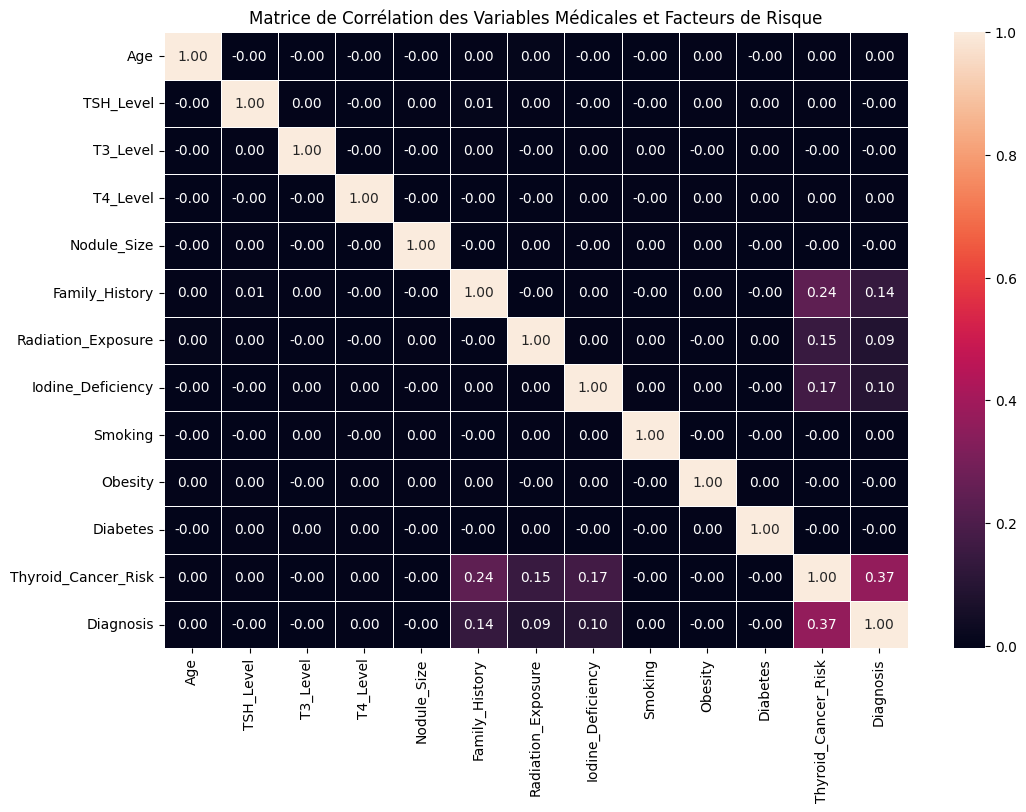

In [15]:
binary_columns = ['Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 
                  'Smoking', 'Obesity', 'Diabetes']
df_encoded = df.copy()
df_encoded[binary_columns] = df_encoded[binary_columns].applymap(lambda x: 1 if x == 'Yes' else 0)

risk_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df_encoded['Thyroid_Cancer_Risk'] = df_encoded['Thyroid_Cancer_Risk'].map(risk_mapping)
diagnosis_mapping = {'Benign': 0, 'Malignant': 1}
df_encoded['Diagnosis'] = df_encoded['Diagnosis'].map(diagnosis_mapping)

numeric_cols = ['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size', 
                'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 
                'Smoking', 'Obesity', 'Diabetes', 'Thyroid_Cancer_Risk', 'Diagnosis']

corr_matrix = df_encoded[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation des Variables Médicales et Facteurs de Risque")
plt.show()

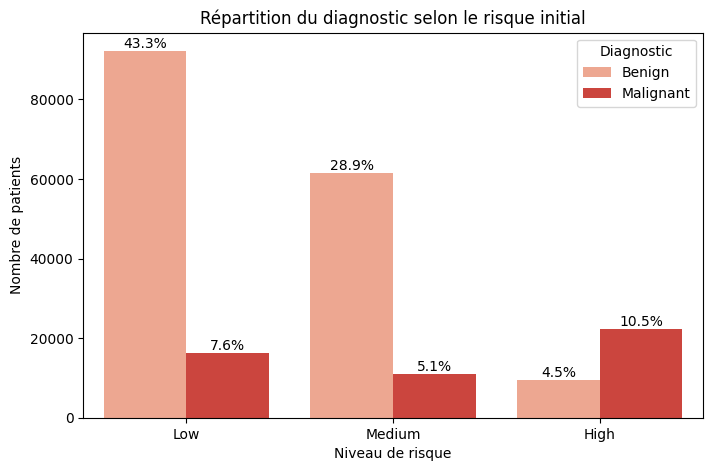

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="Thyroid_Cancer_Risk", hue="Diagnosis", data=df, palette="Reds")

total_count = df.shape[0]

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = height / total_count * 100
        ax.annotate(f"{percentage:.1f}%", (p.get_x() + p.get_width() / 2, height), ha="center", va="bottom", fontsize=10, color="black")

plt.title("Répartition du diagnostic selon le risque initial")
plt.xlabel("Niveau de risque")
plt.ylabel("Nombre de patients")
plt.legend(title="Diagnostic", labels=["Benign", "Malignant"])

plt.show()